In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def Guidedfilter(im, p, r, eps):
    mean_I = cv2.boxFilter(im, cv2.CV_32FC4, (r, r));
    mean_p = cv2.boxFilter(p, cv2.CV_32FC4, (r, r));
    mean_Ip = cv2.boxFilter(im * p, cv2.CV_32FC4, (r, r));
    cov_Ip = mean_Ip - mean_I * mean_p;
    mean_II = cv2.boxFilter(im * im, cv2.CV_32FC4, (r, r));
    var_I = mean_II - mean_I * mean_I;
    #print(mean_Ip[mean_Ip < 0.1])
    print(var_I[var_I < -0.1])
    a = cov_Ip / (var_I + eps);
    b = mean_p - a * mean_I;

    mean_a = cv2.boxFilter(a, cv2.CV_32FC4, (r, r));
    mean_b = cv2.boxFilter(b, cv2.CV_32FC4, (r, r));
    #print(a[a < 0])
    q = mean_a * im + mean_b;
    #print(q)
    return q;

[]


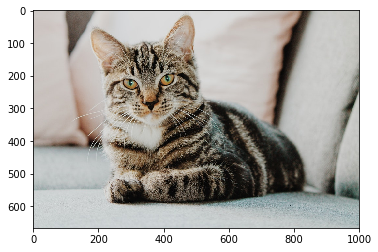

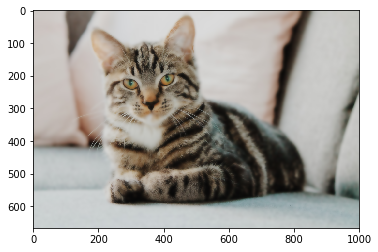

In [26]:
I = cv2.imread("../data/cat2.jpeg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB) / 255
filtered = Guidedfilter(I, I, 8, 0.2 * 0.2)

plt.imshow(I)
plt.figure()
plt.imshow(filtered)

In [4]:
def fastGuidedfilter(im, p, r, eps, s):
    
    size = I.shape
    
    I_sub = cv2.resize(im, (int(size[0] * 1/s), int(size[1] * 1/s)), interpolation=cv2.INTER_AREA)
    p_sub = cv2.resize(p, (int(size[0] * 1/s), int(size[1] * 1/s)), interpolation=cv2.INTER_AREA)
    r_sub = r / s
    
    mean_I = cv2.boxFilter(I_sub, cv2.CV_64F, (r, r));
    mean_p = cv2.boxFilter(p_sub, cv2.CV_64F, (r, r));
    mean_Ip = cv2.boxFilter(I_sub * p_sub, cv2.CV_64F, (r, r));
    cov_Ip = mean_Ip - mean_I * mean_p;
    
    mean_II = cv2.boxFilter(I_sub * I_sub, cv2.CV_64F, (r, r));
    var_I = mean_II - mean_I * mean_I;
    
    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I
    
    mean_a = cv2.boxFilter(a, cv2.CV_64F, (r, r));
    mean_b = cv2.boxFilter(b, cv2.CV_64F, (r, r));
    
    mean_a = cv2.resize(mean_a, (size[0], size[1]), interpolation=cv2.INTER_LINEAR)
    mean_b = cv2.resize(mean_b, (size[0], size[1]), interpolation=cv2.INTER_LINEAR)
    
    q = mean_a * im + mean_b;
    return q;

2.12 ms ± 22.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


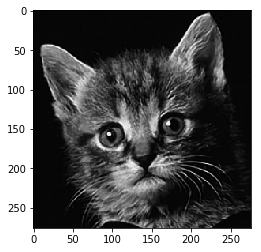

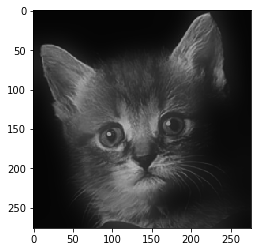

In [59]:
I = cv2.imread("../data/cat.png") / 255
%timeit filtered = fastGuidedfilter(I, I, 8, 0.2 * 0.2, 4)

plt.imshow(I)
plt.figure()
plt.imshow(filtered)

6.54 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


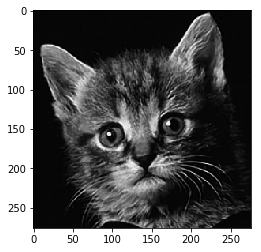

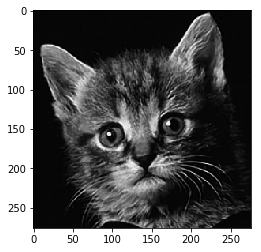

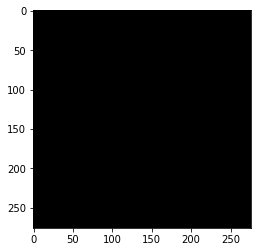

In [58]:
import numpy as np
from cv2.ximgproc import guidedFilter
import timeit

I = cv2.imread("../data/cat.png")

res = np.zeros_like(I)

%timeit res = guidedFilter(dst, I, 8, 0.2 * 0.2)

plt.imshow(I)
plt.figure()
plt.imshow(dst)
plt.figure()
plt.imshow(res)